In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
%matplotlib inline

In [26]:
root_path = "/home/jovyan/work/datacube/esdc-8d-0.083deg-1x2160x4320-1.0.2_1/data"

metadata = ["project_name","long_name","url"] 
cols_to_record = metadata + ['vname','miny','maxy']
out = pd.DataFrame(columns= cols_to_record)

In [27]:
cols_to_record

['project_name', 'long_name', 'url', 'vname', 'miny', 'maxy']

In [28]:
for root, sub_dirs, files in os.walk(root_path):
            for sub_dir in sub_dirs:
                sub_dir_path = os.path.join(root_path, sub_dir).replace("\\", "/") 
                file_names = os.listdir(sub_dir_path)
                miny  = 3000
                maxy = 0
                dat = xr.open_dataset(os.path.join(sub_dir_path,file_names[0]))
                metadata_list=[None]*len(cols_to_record)
                metadata_dict = dict()
                cnt = 0
                for key in metadata:
                    try: 
                        metadata_list[cnt]=dat[sub_dir].attrs[key]
                        metadata_dict[cols_to_record[cnt]] = dat[sub_dir].attrs[key]
                    except:
                        print("Err", sub_dir,key)
                        metadata_dict[cols_to_record[cnt]] = None
                    cnt+=1
                for file in file_names:
                    x = int(file[0:4])
                    miny = x if x < miny else miny
                    maxy = x if x > maxy else maxy
                metadata_dict["miny"]=miny
                metadata_dict["maxy"]=maxy
                metadata_dict["vname"]=sub_dir
                tmp = pd.DataFrame(metadata_dict, index=[0])
                out = pd.concat([out,tmp], ignore_index = True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Err srex_mask project_name
Err srex_mask url
Err country_mask project_name
Err country_mask long_name
Err country_mask url


/opt/conda/lib/python3.6/site-packages/xarray/backends/netCDF4_.py:319: UserWarning: A segmentation fault may occur when the file path has exactly 88 characters as it does in this case. The issue is known to occur with version 1.2.4 of netCDF4 and can be addressed by upgrading netCDF4 to at least version 1.3.1. More details can be found here: https://github.com/pydata/xarray/issues/1745
  'A segmentation fault may occur when the '


In [29]:
out

,long_name,maxy,miny,project_name,url,vname
0,Snow Sublimation,2011,2001,GLEAM,http://www.gleam.eu,snow_sublimation
1,Gross Primary Productivity,2012,2001,FLUXCOM,http://www.fluxcom.org/,gross_primary_productivity
2,Black Sky Albedo for Visible Wavebands,2012,1998,GlobAlbedo,http://www.globalbedo.org/,black_sky_albedo
3,Precip - RealTime [RT] (see documentation for ...,2015,1980,GPCP,http://precip.gsfc.nasa.gov/,precipitation
4,Daily Snow Water Equivalent,2012,1980,GlobSnow,http://www.globsnow.info/,snow_water_equivalent
5,Evaporation,2011,2001,GLEAM,http://www.gleam.eu,evaporation
6,Fraction of Absorbed Photosynthetically Active...,2016,1982,QA4ECV,http://www.qa4ecv.eu/,fapar_tip
7,Potential Evaporation,2011,2001,GLEAM,http://www.gleam.eu,potential_evaporation
8,Directional Hemisphere Reflectance albedo - VI...,2016,1982,QA4ECV - European Union Framework Program 7,http://www.qa4ecv.eu/,black_sky_albedo_avhrr
9,Sensible Heat,2012,2001,FLUXCOM,http://www.fluxcom.org/,sensible_heat


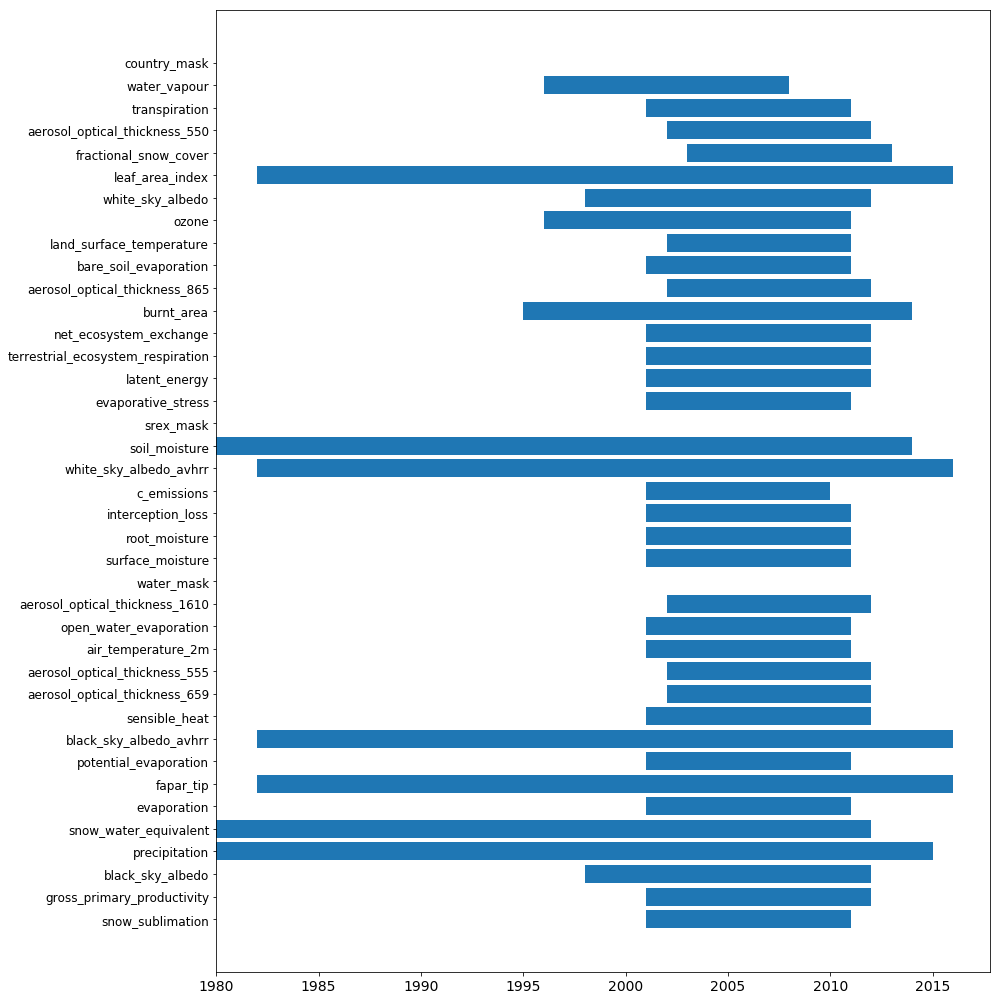

In [30]:
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=12)
out.reset_index()
fig = plt.figure(figsize = [14,14])
plt.title('')
plt.barh(out.index, width=out.maxy-out.miny, left=out.miny, tick_label=out.vname)
plt.tight_layout()
fig.savefig('ESDL_temporal_cover.png')